In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_N = pd.read_csv('D://code//data//data_SA_north//Zhongli_N.csv', low_memory=False)

In [3]:
df_S = pd.read_csv('D://code//data//data_SA_north//Zhongli_S.csv', low_memory=False)

In [10]:
df['ENTRY_TIME'] = pd.to_datetime(df['ENTRY_TIME'],infer_datetime_format=True)
df['EXIT_TIME'] = pd.to_datetime(df['EXIT_TIME'],infer_datetime_format=True)
df['O_TIME'] = pd.to_datetime(df['O_TIME'],infer_datetime_format=True)
df['D_TIME'] = pd.to_datetime(df['D_TIME'],infer_datetime_format=True)

In [2]:
start_min = [00, 11, 21, 31, 41, 51]
end_min = [10, 20, 30, 40, 50, 59]
directions = ['N', 'S']
days = [21, 22, 23, 24, 25, 26, 27]
categories = [31, 32, 41, 42, 5]
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
small_car = [31, 32]
big_car = [42, 5]
big_41 = [41]
n_cats = [small_car, big_41, big_car]


In [3]:
start_min = [00, 11, 21, 31, 41, 51]
end_min = [10, 20, 30, 40, 50, 59]
col_min = []
for i in hours:
    for j in enumerate(start_min):
        string = "{0}:{1}-{0}:{2}".format(i, j[1], end_min[j[0]])
        col_min.append(string)
        #print(string)

#### concat both directions dataframes into one (for Zhongli satation)

In [6]:
df = pd.concat([df_N, df_S])

#### loading other raw data

In [ ]:
df = pd.read_csv('D://code//data//data_SA_north//Xihu.csv', low_memory=False)

In [ ]:
df = pd.read_csv('D://code//data//data_SA_north//Xilou.csv', low_memory=False)

In [ ]:
df = pd.read_csv('D://code//data//data_SA_north//Nantou.csv', low_memory=False)

In [ ]:
df = pd.read_csv('D://code//data//data_SA_north//QingShui.csv', low_memory=False)

In [ ]:
df = pd.read_csv('D://code//data//data_SA_north//Huko.csv', low_memory=False)

In [ ]:
df = pd.read_csv('D://code//data//data_SA_north//Guanxi.csv', low_memory=False)

##### for the rest SA, use a  funtion to run all the process

In [ ]:
SA_name = ["Xihu", "Xilou", "Nantou", "QingShui", "Huko", "Guanxi"]

#### #進入服務區車次統計 (與主線比較占比//分五車種)

In [4]:
def state_amount_cars_sty1(df, stop_col, directions):
    
    # deter whether the SA has divived into N,S two station
    # but the data format isnt accomplished yet
    
    list_31 = []
    list_32 = []
    list_41 = []
    list_42 = []
    list_5 = []

    for day in days :

        for category in categories :

            for dire in directions :    

                cnt_var = df[(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category) & (df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df[stop_col] == 'P')&(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category)& (df.DIRECTION_ID == dire)].shape[0]
                if cnt_var == 0 :
                    per_var = round(float(0), 2)
                else :
                    per_var = round(float((in_var/cnt_var)*100.0), 2)
                pecentage_var = "{0} %".format(per_var)

                if category == 31 :
                    list_31.append(in_var)
                    list_31.append(cnt_var)
                    list_31.append(pecentage_var)
                elif category == 32 :
                    list_32.append(in_var)
                    list_32.append(cnt_var)
                    list_32.append(pecentage_var)
                elif category == 41 :
                    list_41.append(in_var)
                    list_41.append(cnt_var)
                    list_41.append(pecentage_var)
                elif category == 42 :
                    list_42.append(in_var)
                    list_42.append(cnt_var)
                    list_42.append(pecentage_var)
                elif category == 5 :
                    list_5.append(in_var)
                    list_5.append(cnt_var)
                    list_5.append(pecentage_var)
    
    iterables = [['21', '22', '23', '24', '25', '26', '27'], directions, ['in', 'total', 'percentage']]
    col = pd.MultiIndex.from_product(iterables)
    final_df = pd.DataFrame([list_31, list_32, list_41, list_42, list_5], index=['31', '32', '41', '42', '5'], columns=col)
    # if needed a index_version dataframe, use transpose()
    
    return final_df

#### #進入服務區平均停留時間 (分五車種)

In [5]:
def state_stDuration_cars_sty1(df, stop_col, stop_duration, directions):
    
    # deter whether the SA has divived into N,S two station
    # but the data format isnt accomplished yet
    
    list_31 = []
    list_32 = []
    list_41 = []
    list_42 = []
    list_5 = []

    for day in days :

        for category in categories :

            for dire in directions :    

                #cnt_var = df[(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category) & (df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df[stop_col] == 'P')&(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category)& (df.DIRECTION_ID == dire)][stop_duration].mean()
                r_var = round(in_var, 1)
                #per_var = float((in_var/cnt_var)*100.0)

                if category == 31 :
                    list_31.append(r_var)
                    #list_31.append(cnt_var)
                    #list_31.append(per_var)
                elif category == 32 :
                    list_32.append(r_var)
                    #list_32.append(cnt_var)
                    #list_32.append(per_var)
                elif category == 41 :
                    list_41.append(r_var)
                    #list_41.append(cnt_var)
                    #list_41.append(per_var)
                elif category == 42 :
                    list_42.append(r_var)
                    #list_42.append(cnt_var)
                    #list_42.append(per_var)
                elif category == 5 :
                    list_5.append(r_var)
                    #list_5.append(cnt_var)
                    #list_5.append(per_var)
    
    iterables = [['21', '22', '23', '24', '25', '26', '27'], directions]
    col = pd.MultiIndex.from_product(iterables)
    final_df = pd.DataFrame([list_31, list_32, list_41, list_42, list_5], index=['31', '32', '41', '42', '5'], columns=col)
    # if needed a index_version dataframe, use transpose()
    
    return final_df

#### #進服務區與total進服務區佔主線比例 by 每日 by HOUR (total車種), NS分開擺

In [6]:
def state_amount_cars_byHOUR_NS(df, stop_col, directions):
    day_dfs = []
    day_dict = {}
    for dire in directions :
        total_list = []
        for hour in hours :
            dire_list = []
            #df_names = ["day_df_%s"%x for x in range(9)]
            for day in days :
                
             
                cnt_var = df[(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df.STOP == 'P')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                #out_var = df[(df.STOP == 'T')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)].shape[0]
                if cnt_var == 0 :
                    per_var = round(float(0), 2)
                else :
                    per_var = round(float((in_var/cnt_var)*100.0), 2)
                
                #per_var = round(float((in_var/cnt_var)*100.0), 2) => cause error by "division by zero"(cnt_var=0)
                pecentage_var = "{0} %".format(per_var)
                dire_list.append(in_var)
                dire_list.append(cnt_var)
                dire_list.append(pecentage_var)
            total_list.append(dire_list)
        iterables = [[dire], days, ['in', 'total', 'percentage']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['direct_df_%s'%dire] = pd.DataFrame(total_list, index=hours, columns=col)
        
        day_dfs.append(day_dict['direct_df_%s'%dire])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

#### #進服務區車次佔主線比例 by day by HOUR 分車種(產五頁ws), divided NS

In [7]:
def state_amount_cars_byHOUR_carTypes_NS(df, stop_col, cartype, directions):
    day_dfs = []
    day_dict = {}
    for dire in directions :
        total_list = []
        for hour in hours :
            dire_list = []
            #df_names = ["day_df_%s"%x for x in range(9)]
            for day in days :
                
             
                cnt_var = df[(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                in_var = df[(df.STOP == 'P')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                #out_var = df[(df.STOP == 'T')&(df.ENTRY_TIME.dt.day == day)&(df.ENTRY_TIME.dt.hour == hour)&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == cartype)].shape[0]
                if cnt_var == 0 :
                    per_var = round(float(0), 2)
                else :
                    per_var = round(float((in_var/cnt_var)*100.0), 2)
                
                #per_var = round(float((in_var/cnt_var)*100.0), 2) => cause error by "division by zero"(cnt_var=0)
                pecentage_var = "{0} %".format(per_var)
                dire_list.append(in_var)
                dire_list.append(cnt_var)
                dire_list.append(pecentage_var)
            total_list.append(dire_list)
        iterables = [[dire], days, ['in', 'total', 'percentage']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['direct_df_%s'%dire] = pd.DataFrame(total_list, index=hours, columns=col)
        
        day_dfs.append(day_dict['direct_df_%s'%dire])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

#### #各時段進入車輛數vs停留時間(by 10 minute), divided NS

In [8]:
def cars_amount_stD_Day_NS(df, days, stop_col, category, directions) :
    day_dfs = []
    day_dict = {}
    
    categories = [31, 32, 41, 42, 5]
    hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    start_min = [0, 11, 21, 31, 41, 51]
    end_min = [10, 20, 30, 40, 50, 59]
    #directions = ['N', 'S']
    
    
    for dire in directions : 
        total_list = []
        
        for hour in hours :
            
            for num in enumerate(start_min):
                dire_list = []
                for day in days :

                    cnt_var = df[(df.ENTRY_TIME.dt.day == day)& (df[stop_col] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category) & (df.ENTRY_TIME.dt.hour == hour) & (df.ENTRY_TIME.dt.minute >= num[1]) & (df.ENTRY_TIME.dt.minute <= end_min[num[0]])].shape[0]
                    stD_var = df[(df.ENTRY_TIME.dt.day == day)& (df[stop_col] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category) & (df.ENTRY_TIME.dt.hour == hour) & (df.ENTRY_TIME.dt.minute >= num[1]) & (df.ENTRY_TIME.dt.minute <= end_min[num[0]])]['STOP_DURATION'].mean()

                    r_stD_var = round(stD_var, 2)

                    dire_list.append(cnt_var)
                    dire_list.append(r_stD_var)

                total_list.append(dire_list)
        iterables = [[dire], days, ['in', 'stop_duration']]
        col = pd.MultiIndex.from_product(iterables)
        
        
        day_dict['direct_df_%s'%dire] = pd.DataFrame(total_list, index=col_min, columns=col)
        
        day_dfs.append(day_dict['direct_df_%s'%dire])
        
    result_df = pd.concat(day_dfs, axis=1) 
    
    return result_df

#### #進入服務區_性別比 for each SA, everyday, 分車種, adding(df.STOP == 'P')

In [9]:
def M_FM_percentage(df, directions):
    total_list = []
    
    for day in days :
        record = []
        for dire in directions :
            for category in categories:
                result_series = df[(df.ENTRY_TIME.dt.day == day)&(df.STOP == 'P')&(df.DIRECTION_ID == dire)&(df.MVDIS_CATEGORY == category)].groupby("Gender").size()
                
                if hasattr(result_series, '女'):
                    fm = result_series['女']
                    record.append(fm)
                else :
                    value = 0
                    record.append(value)
                if hasattr(result_series, '男'):
                    m = result_series['男']
                    record.append(m)
                else :
                    value = 0
                    record.append(value)
                if hasattr(result_series, '非自然人'):
                    non = result_series['非自然人']
                    record.append(non)
                else :
                    value = 0
                    record.append(value)
                
        total_list.append(record)
    iterables = [directions, ['31', '32', '41', '42', '5'], ['Female', 'Male', 'Non']]
    col = pd.MultiIndex.from_product(iterables)
    
    result_df = pd.DataFrame(total_list, index=days, columns=col)
    
    return result_df
                

#### #進入服務區_性別比 for each SA, everyday, 分車種, adding(df.STOP == 'P'), 各車輛

In [27]:
def M_FM_percentage_CAR(df, directions):
    total_list = []
    
    ## make a unique list of VEHICLE_ID
    #brand_list = []
    #for car in df['VEHICLE_ID'].unique() :
    #    #brand = pd.DataFrame(df[df.VEHICLE_ID == car].head(1))
    #    brand = df[(df.STOP == "P")&(df.VEHICLE_ID == car)].head(1)
    #    brand_list.append(brand)
    #brand_df = pd.concat(brand_list, axis=0) 
    
    for day in days :
        record = []
        for dire in directions :
            
            ## make a unique list of VEHICLE_ID
            car_list = []
            for car in df[(df.ENTRY_TIME.dt.day == day)&(df.DIRECTION_ID == dire)]['VEHICLE_ID'].unique() :
                #brand = pd.DataFrame(df[df.VEHICLE_ID == car].head(1))
                car_row = df[(df.ENTRY_TIME.dt.day == day)&(df.DIRECTION_ID == dire)&(df.STOP == "P")&(df.VEHICLE_ID == car)].head(1)
                car_list.append(car_row)
            car_df = pd.concat(car_list, axis=0) 
            
            for category in categories:
                #result_series = car_df[(car_df.ENTRY_TIME.dt.day == day)&(car_df.STOP == 'P')&(car_df.DIRECTION_ID == dire)&(car_df.MVDIS_CATEGORY == category)].groupby("Gender").size()
                result_series = car_df[(car_df.MVDIS_CATEGORY == category)].groupby("Gender").size()
                
                if hasattr(result_series, '女'):
                    fm = result_series['女']
                    record.append(fm)
                else :
                    value = 0
                    record.append(value)
                if hasattr(result_series, '男'):
                    m = result_series['男']
                    record.append(m)
                else :
                    value = 0
                    record.append(value)
                if hasattr(result_series, '非自然人'):
                    non = result_series['非自然人']
                    record.append(non)
                else :
                    value = 0
                    record.append(value)
                
        total_list.append(record)
    iterables = [directions, ['31', '32', '41', '42', '5'], ['Female', 'Male', 'Non']]
    col = pd.MultiIndex.from_product(iterables)
    
    result_df = pd.DataFrame(total_list, index=days, columns=col)
    
    return result_df
                

#### #進入服務區車_車廠(各SA), 車次

In [10]:
def stat_car_brand_eachSA(df, directions):
    directions_dfs = []
        
    for dire in directions :
        group_dict = {}
        cat_dfs = []
        for day in days :
            
            # for each car type
            for category in categories :
                series = df[(df.ENTRY_TIME.dt.day == day) & (df["STOP"] == 'P')  &(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)]\
                .groupby("BRAND").size().sort_values(0, ascending=False)[:20]
                tmp_df = pd.DataFrame(series).reset_index()
                #tmp_df.index = list(range(1, 21))
                #tmp_df.columns = ["BRAND", "car_num"]
                
                group_dict['{0}_{1}'.format(day, category)] = tmp_df
                cat_dfs.append(group_dict['{0}_{1}'.format(day, category)])
            
            # for total car types grouping
            series_total = df[(df.ENTRY_TIME.dt.day == day) & (df["STOP"] == 'P')  &(df.DIRECTION_ID == dire)].groupby("BRAND")\
            .size().sort_values(0, ascending=False)[:20]
            total_df = pd.DataFrame(series_total).reset_index()
            #total_df.index = list(range(1, 21))
            #total_df.columns = ["BRAND", "car_num"]
            
            group_dict['{0}_total'.format(day)] = total_df
            cat_dfs.append(group_dict['{0}_total'.format(day)])
            ## end session ## 
        
        
        days_df = pd.concat(cat_dfs, axis=1)
        directions_dfs.append(days_df)
        
    iterables = [directions, days, ['31', '32', '41', '42', '5', 'total'], ['BRAND', 'car_num']]
    col = pd.MultiIndex.from_product(iterables)
        
    result_df = pd.concat(directions_dfs, axis=1)
    result_df.columns = col
    
    return result_df

#### #進入服務區車_車廠(各SA), 車輛

In [28]:
def stat_car_brand_eachSA_CAR(df, directions):
    directions_dfs = []
    
    #brand_list = []
    #for car in df['VEHICLE_ID'].unique() :
    #    #brand = pd.DataFrame(df[df.VEHICLE_ID == car].head(1))
    #    brand = df[(df.STOP == "P")&(df.VEHICLE_ID == car)].head(1)
    #    brand_list.append(brand)
    #brand_df = pd.concat(brand_list, axis=0)    
    
    for dire in directions :
        group_dict = {}
        cat_dfs = []
        for day in days :
            car_list = []
            for car in df[(df.DIRECTION_ID == dire)&(df.ENTRY_TIME.dt.day == day)]['VEHICLE_ID'].unique() :
                #brand = pd.DataFrame(df[df.VEHICLE_ID == car].head(1))
                car_row = df[(df.DIRECTION_ID == dire)&(df.ENTRY_TIME.dt.day == day)&(df.STOP == "P")&(df.VEHICLE_ID == car)].head(1)
                car_list.append(car_row)
            car_df = pd.concat(car_list, axis=0)    
            
            # for each car type
            for category in categories :
                #series = car_df[(car_df.ENTRY_TIME.dt.day == day) & (car_df.DIRECTION_ID == dire)& (car_df.MVDIS_CATEGORY == category)]\
                #.groupby("BRAND").size().sort_values(0, ascending=False)[:20]
                series = car_df[(car_df.MVDIS_CATEGORY == category)].groupby("BRAND").size().sort_values(0, ascending=False)[:20]
                tmp_df = pd.DataFrame(series).reset_index()
                #tmp_df.index = list(range(1, 21))
                #tmp_df.columns = ["BRAND", "car_num"]
                
                group_dict['{0}_{1}'.format(day, category)] = tmp_df
                cat_dfs.append(group_dict['{0}_{1}'.format(day, category)])
            
            # for total car types grouping
            
            #series_total = car_df[(car_df.ENTRY_TIME.dt.day == day) & (car_df["STOP"] == 'P')  &(car_df.DIRECTION_ID == dire)].groupby("BRAND")\
            #.size().sort_values(0, ascending=False)[:20]
            series_total = car_df.groupby("BRAND").size().sort_values(0, ascending=False)[:20]
            
            total_df = pd.DataFrame(series_total).reset_index()
            #total_df.index = list(range(1, 21))
            #total_df.columns = ["BRAND", "car_num"]
            
            group_dict['{0}_total'.format(day)] = total_df
            cat_dfs.append(group_dict['{0}_total'.format(day)])
            ## end session ## 
        
        
        days_df = pd.concat(cat_dfs, axis=1)
        directions_dfs.append(days_df)
        
    iterables = [directions, days, ['31', '32', '41', '42', '5', 'total'], ['BRAND', 'car_num']]
    col = pd.MultiIndex.from_product(iterables)
        
    result_df = pd.concat(directions_dfs, axis=1)
    result_df.columns = col
    
    return result_df

In [184]:
stat_car_brand_eachSA_CAR(df, directions)

N                                                  \
            21                                                   
            31                  32                  41           
         BRAND car_num       BRAND car_num       BRAND car_num   
0       TOYOTA    1057          中華   491.0      SCANIA    47.0   
1       NISSAN     348      TOYOTA   168.0          順益    28.0   
2         FORD     179        FORD   124.0      DAEWOO    17.0   
3        MAZDA     165       HONDA    80.0          百盛    14.0   
4           中華     161      NISSAN    72.0      TOYOTA    11.0   
5         BENZ     157          三陽    68.0       VOLVO    10.0   
6        HONDA     154         納智捷    51.0          昇鋒     3.0   
7   VOLKSWAGEN     142       ISUZU    39.0       陝汽雄獅曼     2.0   
8          BMW     117       MAZDA    26.0          三陽     1.0   
9        LEXUS     106         KIA    19.0  MITSUBISHI     1.0   
10          三陽     103      SUZUKI    17.0       ISUZU     1.0   
11      SUZUKI      62          慶眾    10.0        FORD     1.0   
12       VOLVO      34  VOLKSWAGEN     5.0         NaN     NaN   
13      SUBARU      29       IVECO     3.0         NaN     NaN   
14        AUDI      28          慶     2.0         NaN     NaN   
15         納智捷      18      SUBARU     1.0         NaN     NaN   
16       SKODA      17   SsangYong     1.0         NaN     NaN   
17     PORSCHE      13      HUMMER     1.0         NaN     NaN   
18     PEUGEOT      12      臺灣東風小康     1.0         NaN     NaN   
19     HYUNDAI      10         NaN     NaN         NaN     NaN   

                                                         ...                \
                                                         ...            27   
                   42                        5           ...            32   
                BRAND car_num            BRAND car_num   ...         BRAND   
0              TOYOTA   188.0           SCANIA    69.0   ...            中華   
1                  中華   101.0            VOLVO    44.0   ...         HONDA   
2               ISUZU    38.0           TOYOTA    40.0   ...        TOYOTA   
3                 DAF    36.0               順益    39.0   ...          FORD   
4          MITSUBISHI    31.0       MITSUBISHI    33.0   ...           納智捷   
5              SCANIA    17.0             BENZ    26.0   ...        NISSAN   
6              NISSAN    15.0              DAF    25.0   ...            三陽   
7                  順益    10.0               健益     6.0   ...         MAZDA   
8                BENZ     9.0              MAN     5.0   ...            慶眾   
9                HINO     6.0           NISSAN     3.0   ...        SUZUKI   
10              VOLVO     4.0            ISUZU     2.0   ...           KIA   
11           UDTRUCKS     3.0           DAEWOO     2.0   ...         ISUZU   
12                MAN     2.0    NISSAN DIESEL     1.0   ...    VOLKSWAGEN   
13    MITSUBISHI FUSO     1.0  MITSUBISHI FUSO     1.0   ...            慶   
14  Mitsubishi 三菱(中華)     1.0              NaN     NaN   ...     Nissan 日產   
15        MITSU BISHI     1.0              NaN     NaN   ...     SsangYong   
16              MAZDA     1.0              NaN     NaN   ...           BMW   
17              ISUZI     1.0              NaN     NaN   ...           NaN   
18                NaN     NaN              NaN     NaN   ...           NaN   
19                NaN     NaN              NaN     NaN   ...           NaN   

                                                                              \
                                                                               
                         41                       42                       5   
   car_num            BRAND car_num            BRAND car_num           BRAND   
0    575.0           SCANIA   222.0           TOYOTA    46.0          SCANIA   
1    357.0               順益   212.0               中華    23.0              順益   
2    273.0           TOYOTA   112.0            ISUZU    10.0           VOLV

#### #進入服務區車於觀察區間的表現(各SA)
#### #進入服務區車於觀察區間的表現(for one SA)

In [12]:
def behavioral_state(df, directions):
    wk_wd = ['WEEKDAY_CNT', 'Holiday_cnt']
    total_dfs = {}
    dfs = []
    for dire in directions :
        dire_list = []
        for category in categories:
            list_type = []
            
            total_var = df[(df.VEHICLE_ID.isin(df[df.STOP == 'P']['VEHICLE_ID'].unique()))&(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)].shape[0]
            #for w in wk_wd :
            wd_var = df[(df.VEHICLE_ID.isin(df[df.STOP == 'P']['VEHICLE_ID'].unique()))&(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)]["WEEKDAY_CNT"].mean()
            wk_var = df[(df.VEHICLE_ID.isin(df[df.STOP == 'P']['VEHICLE_ID'].unique()))&(df.DIRECTION_ID == dire)& (df.MVDIS_CATEGORY == category)]["Holiday_cnt"].mean()
            r_total_var = round(total_var, 0)
            r_wd_var = round(wd_var, 2)
            r_wk_var = round(wk_var, 2)
            
            #print (n_cat, ' : ', w, ' = ', var)
            list_type.append(r_total_var)
            list_type.append(r_wd_var)
            list_type.append(r_wk_var)
            
            dire_list.append(list_type)
            
        dire_df = pd.DataFrame(dire_list, index = categories)
        total_dfs["{0}_df".format(dire)] = dire_df
        dfs.append(total_dfs["{0}_df".format(dire)])
    iterables = [directions, ['car_cnt', 'weekday_avg', 'weekend_avg']]
    col = pd.MultiIndex.from_product(iterables)
    result_df = pd.concat(dfs, axis=1)
    result_df.columns = col
    
    return result_df
            
            
            

#### #進入服務區車於觀察區間的表現(for one SA) FIXED

In [29]:
def behavioral_state_fx(df, directions):
    wk_wd = ['WEEKDAY_CNT', 'Holiday_cnt']
    total_dfs = {}
    dfs = []
    ## make a unique list of VEHICLE_ID
    #brand_list = []
    #for car in df['VEHICLE_ID'].unique() :
    #    brand = df[df.VEHICLE_ID == car].head(1)
    #    brand_list.append(brand)
    #brand_df = pd.concat(brand_list, axis=0)
    
    
    for dire in directions :
        dire_list = []
        # make a unique list of VEHICLE_ID
        car_list = []
        for car in df[df.DIRECTION_ID == dire]['VEHICLE_ID'].unique() :
            car_row = df[(df.VEHICLE_ID == car)&(df.DIRECTION_ID == dire)].head(1)
            car_list.append(car_row)
        car_df = pd.concat(car_list, axis=0)
        
        for category in categories:
            list_type = []
            
            #total_var = car_df[(car_df.DIRECTION_ID == dire)& (car_df.MVDIS_CATEGORY == category)].shape[0]
            total_var = car_df[(car_df.MVDIS_CATEGORY == category)].shape[0]
            
            #for w in wk_wd :
            #wd_var = car_df[(car_df.DIRECTION_ID == dire)& (car_df.MVDIS_CATEGORY == category)]["WEEKDAY_CNT"].mean()
            #wk_var = car_df[(car_df.DIRECTION_ID == dire)& (car_df.MVDIS_CATEGORY == category)]["Holiday_cnt"].mean()
            
            wd_var = car_df[(car_df.MVDIS_CATEGORY == category)]["WEEKDAY_CNT"].mean()
            wk_var = car_df[(car_df.MVDIS_CATEGORY == category)]["Holiday_cnt"].mean()
            
            r_total_var = round(total_var, 0)
            r_wd_var = round(wd_var, 2)
            r_wk_var = round(wk_var, 2)
            
            #print (n_cat, ' : ', w, ' = ', var)
            list_type.append(r_total_var)
            list_type.append(r_wd_var)
            list_type.append(r_wk_var)
            
            dire_list.append(list_type)
            
        dire_df = pd.DataFrame(dire_list, index = categories)
        total_dfs["{0}_df".format(dire)] = dire_df
        dfs.append(total_dfs["{0}_df".format(dire)])
    iterables = [directions, ['car_cnt', 'weekday_avg', 'weekend_avg']]
    col = pd.MultiIndex.from_product(iterables)
    result_df = pd.concat(dfs, axis=1)
    result_df.columns = col
    
    return result_df
            
            
            

#### running functions

In [25]:
df_zhongli = state_amount_cars_sty1(df, 'STOP')
print("complete")
df_zhongli_HOUR_T_NS = state_amount_cars_byHOUR_NS(df, 'STOP')
print("complete")
df_zhongli_HOUR_31_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 31)
print("complete")
df_zhongli_HOUR_32_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 32)
print("complete")
df_zhongli_HOUR_41_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 41)
print("complete")
df_zhongli_HOUR_42_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 42)
print("complete")
df_zhongli_HOUR_5_NS = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", 5)
print("complete")
df_zhongli_stD = state_stDuration_cars_sty1(df, 'STOP', 'STOP_DURATION')
print("complete")
df_zhongli_stDcnt_31_NS = cars_amount_stD_Day_NS(df, days, "STOP", 31)
print("complete")
df_zhongli_stDcnt_32_NS = cars_amount_stD_Day_NS(df, days, "STOP", 32)
print("complete")
df_zhongli_stDcnt_41_NS = cars_amount_stD_Day_NS(df, days, "STOP", 41)
print("complete")
df_zhongli_stDcnt_42_NS = cars_amount_stD_Day_NS(df, days, "STOP", 42)
print("complete")
df_zhongli_stDcnt_5_NS = cars_amount_stD_Day_NS(df, days, "STOP", 5)
print("complete")
df_zhongli_FMF_df = M_FM_percentage(df)
print("complete")
df_zhongli_total_brand_sorting = stat_car_brand_eachSA(df)
print("complete")
df_zhongli_behave_taian_df = behavioral_state(df).transpose()
print("complete")

complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete


In [72]:
df_zhongli_FMF_df = M_FM_percentage(df)

In [73]:
df_zhongli_FMF_df

N                                                           ...   \
       31                  32                 41                42  ...    
   Female   Male   Non Female  Male   Non Female Male   Non Female  ...    
21  16972  15858  5633   2890  4422  7670      0    0  1519      0  ...    
22  15217  14107  5322   2792  4327  7719      0    0  1356      0  ...    
23  16453  14689  5596   2833  4536  7969      0    0  1439      0  ...    
24  20152  18701  6871   3401  5195  8643      0    0  1644      0  ...    
25      0      0     0      0     0     0      0    0     0      0  ...    
26      0      0     0      0     0     0      0    0     0      0  ...    
27      0      0     0      0     0     0      0    0     0      0  ...    

       S                                                        
      32     41                42                 5             
     Non Female Male   Non Female Male   Non Female Male   Non  
21  8079      0    0  1898      0    2  5939      0    0  4252  
22  8864      0    0  1859      0    2  6799      0    0  5110  
23  8640      0    0  1880      0    3  6657      0    0  4936  
24  8662      0    0  1821      0    3  6783      0    0  5117  
25  8782      0    0  2102      0    5  6755      0    0  4927  
26  4379      0    0  2010      0    1  3137      0    0  2665  
27  2525      0    0  1901      0    1  1488      0    0  1625  

[7 rows x 30 columns]

In [126]:
df

SERVICE_AREA         BMS_TX_BATCH DIRECTION_ID              ENTRY_TIME  \
0                西螺  1805240002309967858            N 2018-05-24 01:03:15.337   
1                西螺  1805240002309968686            N 2018-05-24 01:02:51.607   
2                西螺  1805240002309988336            N 2018-05-24 00:52:38.660   
3                西螺  1805210002305608615            N 2018-05-21 00:38:16.737   
4                西螺  1805210002305612433            N 2018-05-21 00:38:57.387   
5                西螺  1805210002305623305            N 2018-05-21 00:29:44.130   
6                西螺  1805210002305635215            N 2018-05-21 00:30:29.870   
7                西螺  1805210002305608599            N 2018-05-21 00:39:32.427   
8                西螺  1805210002305634596            N 2018-05-21 00:39:47.803   
9                西螺  1805210002305624874            N 2018-05-21 00:40:46.843   
10               西螺  1805210002305635844            N 2018-05-21 00:41:22.187   
11               西螺  1805210002305637355            N 2018-05-21 00:41:26.850   
12               西螺  1805210002305609029            N 2018-05-21 00:41:36.010   
13               西螺  1805210002305613177            N 2018-05-21 00:34:18.717   
14               西螺  1805210002305626255            N 2018-05-21 00:32:19.293   
15               西螺  1805210002305614527            N 2018-05-21 00:42:06.680   
16               西螺  1805210002305616679            N 2018-05-21 00:43:25.107   
17               西螺  1805210002305612654            N 2018-05-21 00:27:45.447   
18               西螺  1805210002305614247            N 2018-05-21 00:44:27.373   
19               西螺  1805210002305610814            N 2018-05-21 00:45:03.737   
20               西螺  1805210002305619370            N 2018-05-21 00:45:30.417   
21               西螺  1805210002305620055            N 2018-05-21 00:35:09.103   
22               西螺  1805210002305638442            N 2018-05-21 00:44:54.863   
23               西螺  1805210002305614459            N 2018-05-21 00:47:22.367   
24               西螺  1805210002305611913            N 2018-05-21 00:47:14.440   
25               西螺  1805210002305611299            N 2018-05-21 00:47:46.503   
26               西螺  1805210002305619379            N 2018-05-21 00:47:20.393   
27               西螺  1805210002305633391            N 2018-05-21 00:50:07.013   
28               西螺  1805210002305614238            N 2018-05-21 00:47:50.577   
29               西螺  1805210002305633280            N 2018-05-21 00:41:34.460   
...             ...                  ...          ...                     ...   
280050           西螺  1805260002314376124            N 2018-05-26 18:28:45.783   
280051           西螺  1805260002314405318            N 2018-05-26 18:28:39.413   
280052           西螺  1805260002314175716            N 2018-05-26 18:10:27.677   
280053           西螺  1805260002313196590            N 2018-05-26 18:28:52.070   
280054           西螺  1805260002314384316            N 2018-05-26 18:29:29.007   
280055           西螺  1805260002314406250            N 2018-05-26 18:29:15.037   
280056           西螺  1805270002315619994            N 2018-05-27 19:22:54.847   
280057           西螺  1805270002314711608            N 2018-05-27 19:22:53.243   
280058           西螺  1805270002315245572            N 2018-05-27 19:10:51.923   
280059           西螺  1805270002315862414            N 2018-05-27 19:22:51.900   
280060           西螺  1805270002315882131            N 2018-05-27 19:22:56.867   
280061           西螺  1805270002315078706            N 2018-05-27 19:23:34.580   
280062           西螺  1805270002315880295            N 2018-05-27 19:22:41.847   
280063           西螺  1805270002315785680            N 2018-05-27 19:23:15.167   
280064           西螺  1805270002314722131            N 2018-05-27 19:23:03.937   
280065           西螺  1805270002315761203            N 2018-05-27 19:23:27.597   
280066           西螺  1805270002314618425            N 2018-05-27 19:14:06.160   
280067           西螺  18052700023155598

In [128]:
df_xilou_stD_forDraw = state_amount_cars_sty2(df, "STOP", directions)

In [129]:
df_xilou_stD_forDraw

21                                            22           \
                    31       32       41       42        5        31       32   
N in           3094.00  1275.00   181.00   648.00   449.00   2617.00  1156.00   
  total       21375.00  8023.00  1368.00  4484.00  5237.00  17551.00  7579.00   
  percentage     14.47    15.89    13.23    14.45     8.57     14.91    15.25   

                                          ...           26                    \
                   41       42        5   ...           31       32       41   
N in           198.00   744.00   514.00   ...      3995.00  1116.00   360.00   
  total       1259.00  5135.00  6007.00   ...     25858.00  6919.00  1695.00   
  percentage    15.73    14.49     8.56   ...        15.45    16.13    21.24   

                                     27                                     
                   42        5       31       32       41      42        5  
N in           241.00   165.00  10210.0  2280.00   942.00  165.00   235.00  
  total       1775.00  2908.00  31125.0  7348.00  2329.00  789.00  1329.00  
  percentage    13.58     5.67     32.8    31.03    40.45   20.91    17.68  

[3 rows x 35 columns]

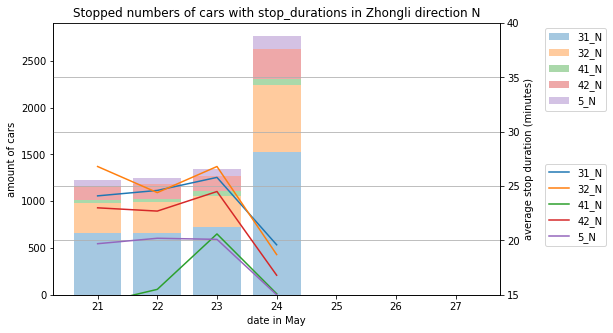

In [111]:
#draw_cars_amount(days, df_taian_stD_forDraw, df_taian_stD, "N", "0521_0527")
draw_cars_amount(days, df_zhongli_stD_forDraw, df_zhongli_stD, "N", "Zhongli", "0521_0527")

In [50]:
df_stDcnt_dict = {}
df_stDcnt_dict["31_min_df"] = df_zhongli_stDcnt_31_NS
df_stDcnt_dict["32_min_df"] = df_zhongli_stDcnt_32_NS
df_stDcnt_dict["41_min_df"] = df_zhongli_stDcnt_41_NS
df_stDcnt_dict["42_min_df"] = df_zhongli_stDcnt_42_NS
df_stDcnt_dict["5_min_df"] = df_zhongli_stDcnt_5_NS

In [63]:
df[(df.ENTRY_TIME.dt.day == 25)&(df.DIRECTION_ID == "N")]["ENTRY_TIME"].max()

Timestamp('2018-05-24 22:25:02.843000')

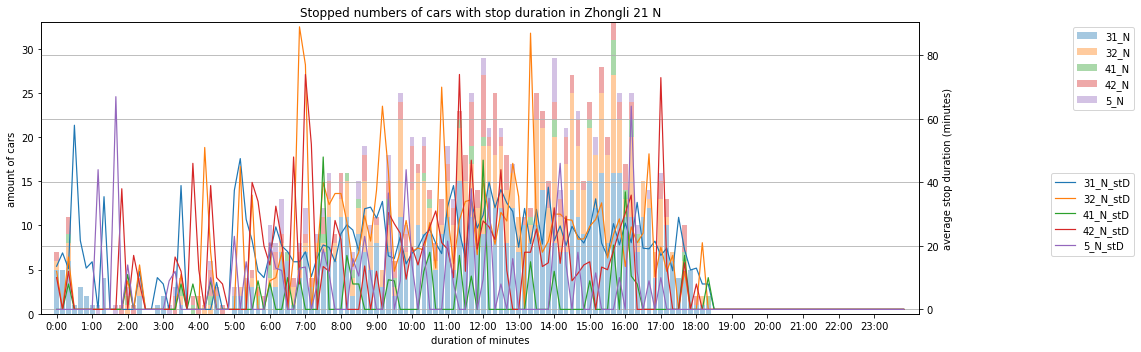

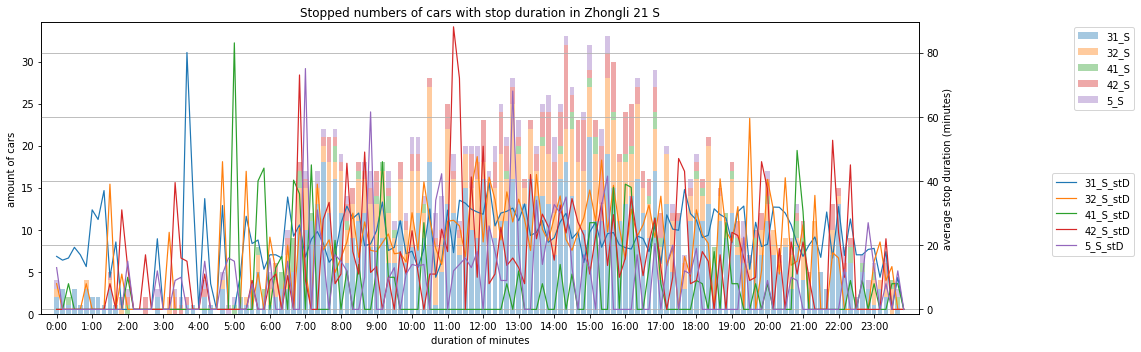

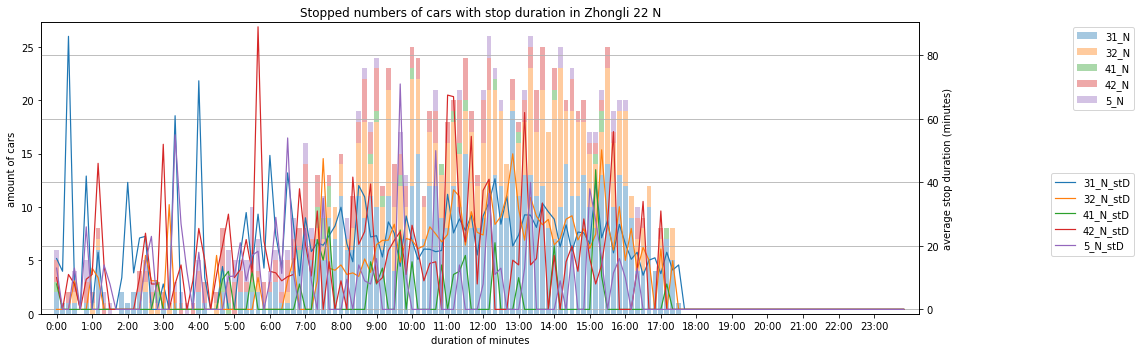

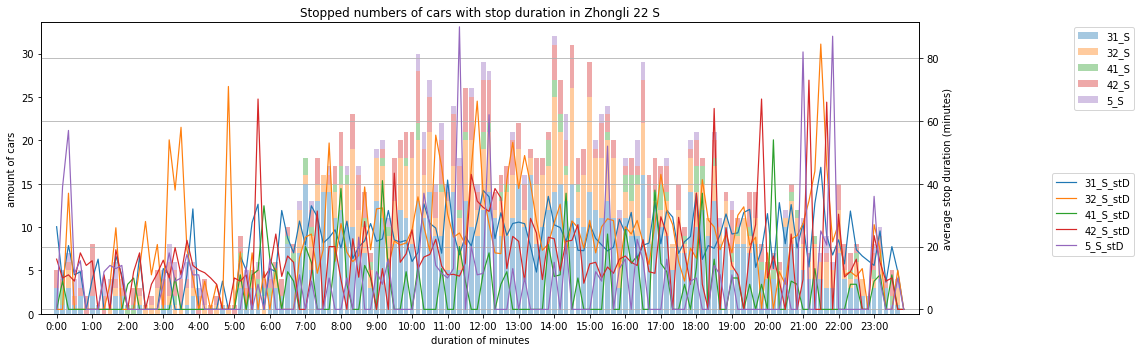

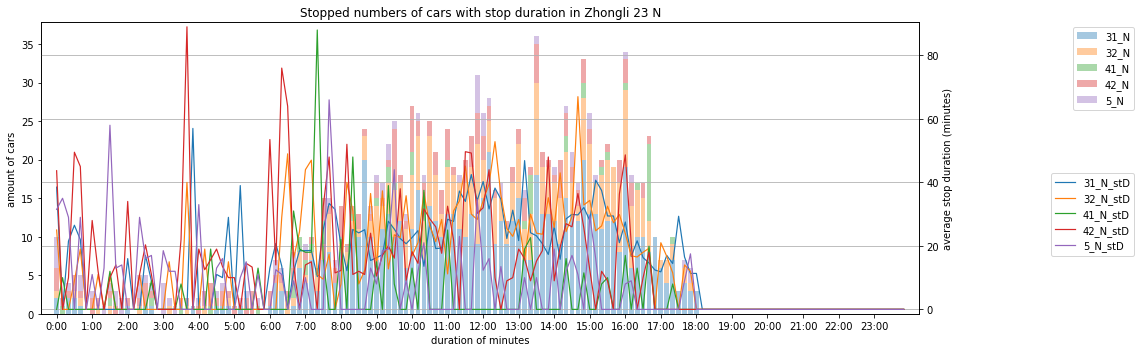

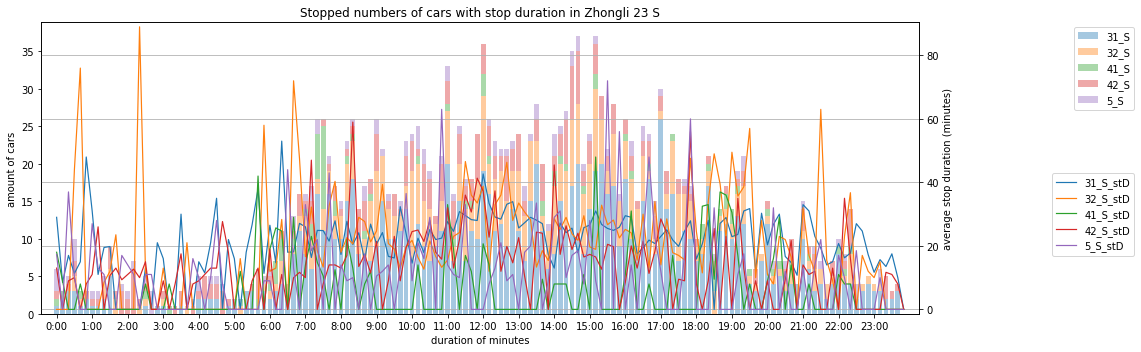

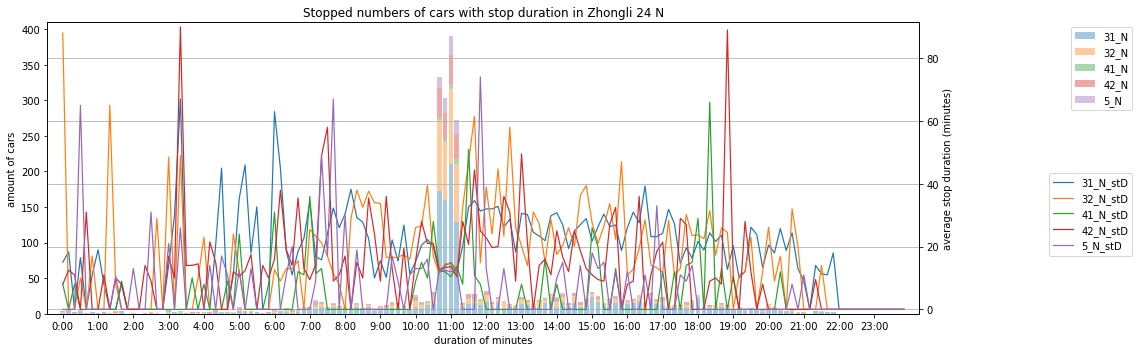

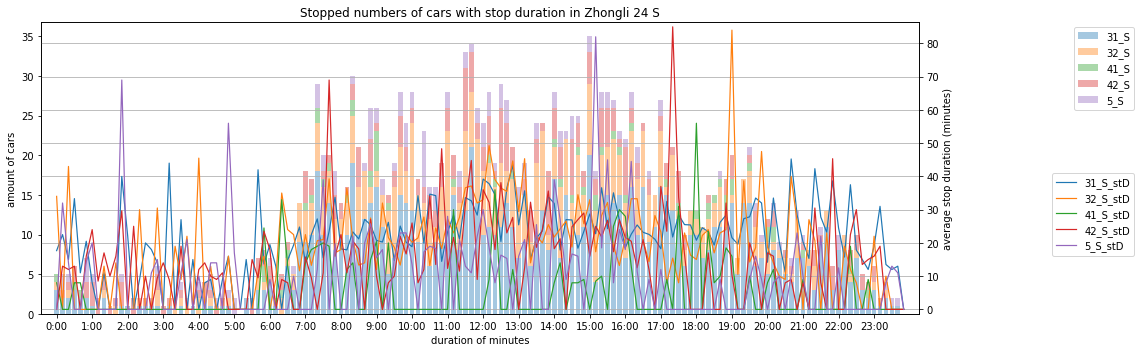

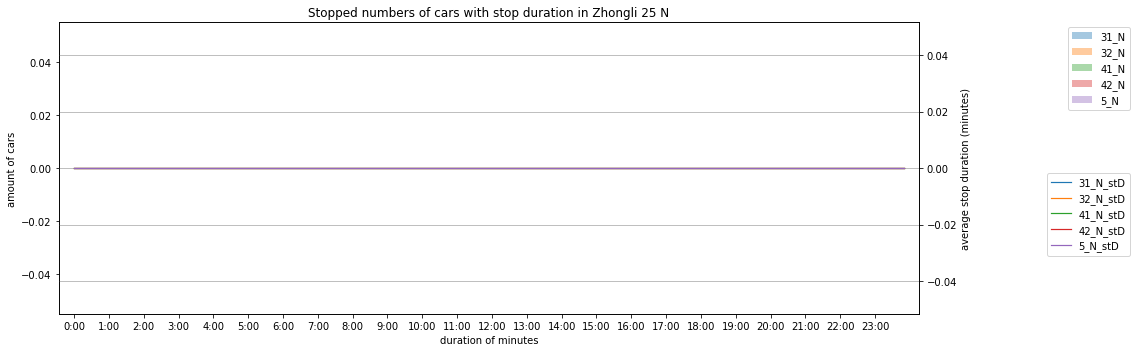

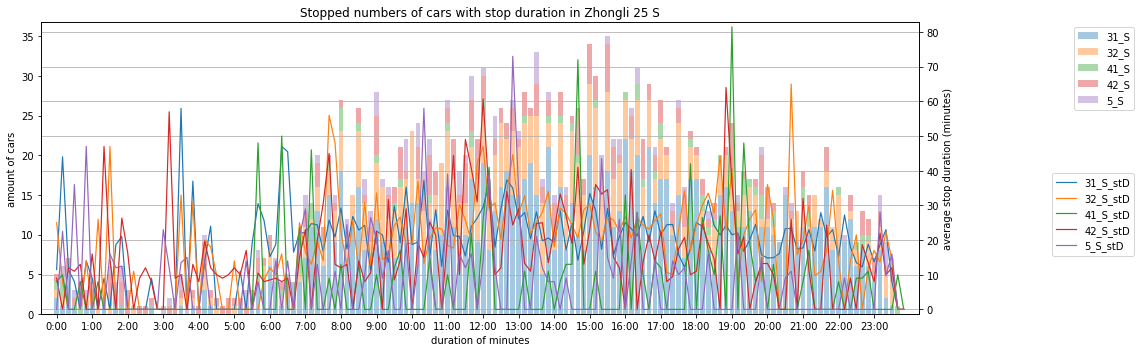

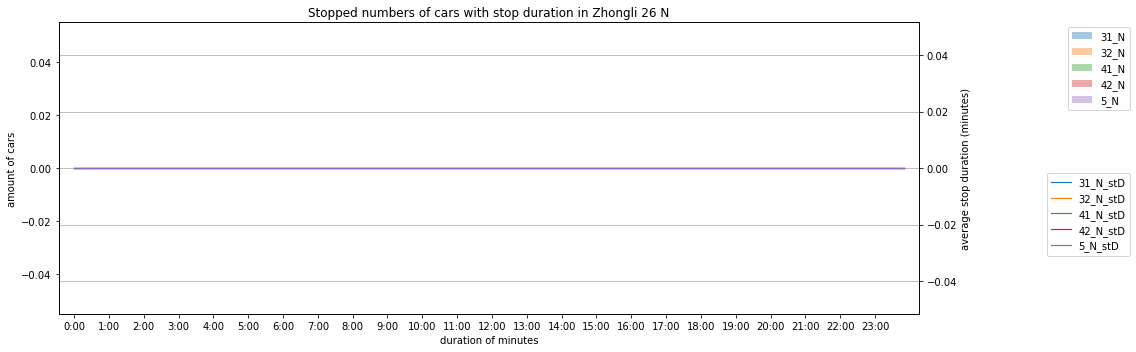

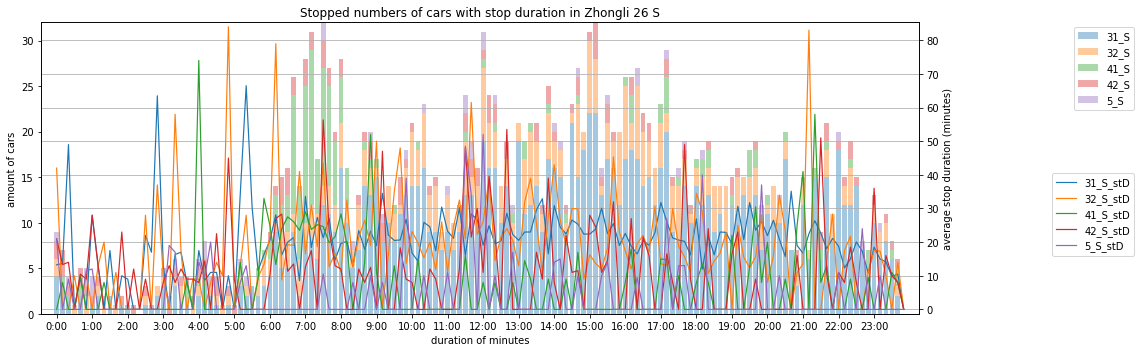

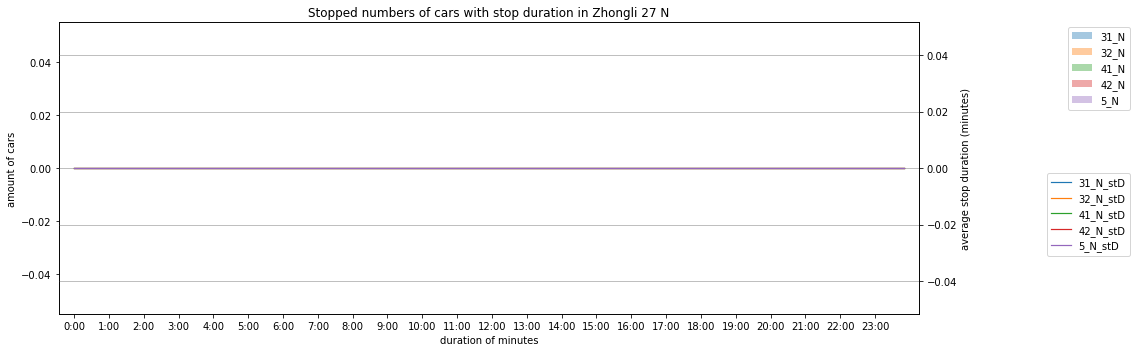

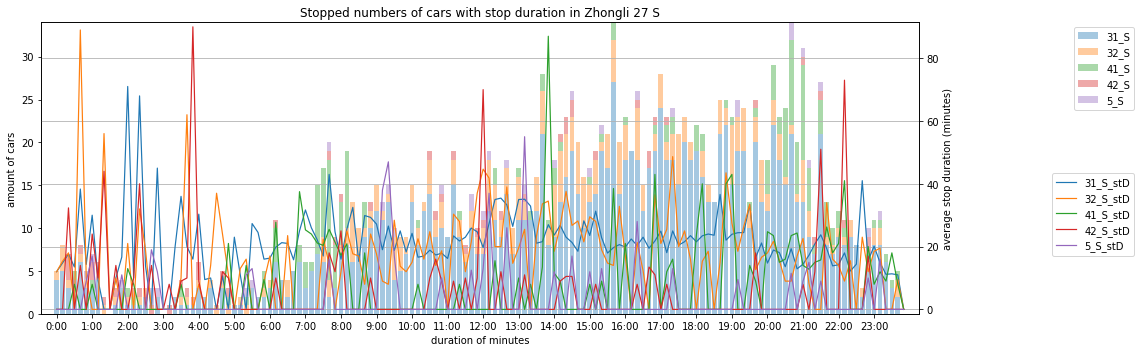

In [89]:
drawing_stD_cnt_10min_batch(df_stDcnt_dict, days, col_min, "Zhongli")

##### for the rest station

In [14]:
#SA_name = ["QingShui", "Huko", "Guanxi"]
#SA_name = ["Zhongli", "Xihu", "Xilou", "Nantou", "QingShui", "Huko", "Guanxi"]
SA_name = ["Zhongli"]

report_dict = {}
for SA in SA_name :
    # loading data
    if SA == "Zhongli":
        df_N = pd.read_csv('D://code//data//data_SA_north//{0}_N.csv'.format(SA), low_memory=False)
        df_S = pd.read_csv('D://code//data//data_SA_north//{0}_S.csv'.format(SA), low_memory=False)
        df = pd.concat([df_N, df_S])
    else :
        df = pd.read_csv('D://code//data//data_SA_north//{0}.csv'.format(SA), low_memory=False)
        
    df['ENTRY_TIME'] = pd.to_datetime(df['ENTRY_TIME'],infer_datetime_format=True)
    df['EXIT_TIME'] = pd.to_datetime(df['EXIT_TIME'],infer_datetime_format=True)
    df['O_TIME'] = pd.to_datetime(df['O_TIME'],infer_datetime_format=True)
    df['D_TIME'] = pd.to_datetime(df['D_TIME'],infer_datetime_format=True)
    
    
    
    # setting for the station having only one direction
    if (SA == "Xilou") or (SA == "Guanxi") :
        directions = ["N"]
    else :
        directions = ['N', 'S']
    df_stDcnt_dict = {}
    # process all the function
    report_dict["df_{0}".format(SA)] = state_amount_cars_sty1(df, 'STOP', directions)
    report_dict["df_{0}_HOUR_T_NS".format(SA)] = state_amount_cars_byHOUR_NS(df, 'STOP', directions)
    report_dict["df_{0}_stD".format(SA)] = state_stDuration_cars_sty1(df, 'STOP', 'STOP_DURATION', directions)
    report_dict["df_{0}_FMF_df".format(SA)] = M_FM_percentage(df, directions)
    report_dict["df_{0}_total_brand_sorting".format(SA)] = stat_car_brand_eachSA(df, directions)
    report_dict["df_{0}_behave_taian_df".format(SA)] = behavioral_state(df, directions).transpose()
    for category in categories :
        report_dict["df_{0}_HOUR_{1}_NS".format(SA, category)] = state_amount_cars_byHOUR_carTypes_NS(df, "STOP", category, directions)
        report_dict["df_{0}_stDcnt_{1}_NS".format(SA, category)] = cars_amount_stD_Day_NS(df, days, "STOP", category, directions)
        df_stDcnt_dict["{0}_min_df".format(category)] = report_dict["df_{0}_stDcnt_{1}_NS".format(SA, category)]
        
    # make it into an excel
    writer = pd.ExcelWriter('D://code//data//data_SA_north//analysis_result//{0}.xlsx'.format(SA))
    report_dict["df_{0}".format(SA)].to_excel(writer,'AmountOfCarsIntoSA')
    report_dict["df_{0}_HOUR_T_NS".format(SA)].to_excel(writer,'byHOUR_AmountOfCarsIntoSA')
    for category in categories :
        report_dict["df_{0}_HOUR_{1}_NS".format(SA, category)].to_excel(writer,'byHOUR_{0}_AmountOfCarsIntoSA'.format(category))
        report_dict["df_{0}_stDcnt_{1}_NS".format(SA, category)].to_excel(writer,'{0}_stD_cnt'.format(category))
    
    report_dict["df_{0}_stD".format(SA)].to_excel(writer,'StopDurationIntoSA') 
    
    report_dict["df_{0}_FMF_df".format(SA)].to_excel(writer,'gender_everyday') 
    report_dict["df_{0}_total_brand_sorting".format(SA)].to_excel(writer,'brand_sorting') 
    report_dict["df_{0}_behave_taian_df".format(SA)].to_excel(writer,'behavioral_state') 
    writer.save()
    
    # drawing session
    report_dict["df_{0}_stD_forDraw".format(SA)] = state_amount_cars_sty2(df, "STOP", directions)
    for dire in directions :
        draw_cars_amount(days, report_dict["df_{0}_stD_forDraw".format(SA)], report_dict["df_{0}_stD".format(SA)], dire, SA, "0521_0527")
    drawing_stD_cnt_10min_batch(df_stDcnt_dict, days, col_min, SA)

NameError: name 'state_amount_cars_sty2' is not defined

#### fixed function, into new file

In [ ]:
SA_name = ["Taian", "Zhongli", "Xihu", "Xilou", "Nantou", "QingShui", "Huko", "Guanxi"]
#SA_name = ["Zhongli", "Xihu", "Xilou", "Nantou", "QingShui", "Huko", "Guanxi"]
report_dict = {}
for SA in SA_name :
    # loading data
    if SA == "Zhongli":
        df_N = pd.read_csv('D://code//data//data_SA_north//{0}_N.csv'.format(SA), low_memory=False)
        df_S = pd.read_csv('D://code//data//data_SA_north//{0}_S.csv'.format(SA), low_memory=False)
        df = pd.concat([df_N, df_S])
    else :
        df = pd.read_csv('D://code//data//data_SA_north//{0}.csv'.format(SA), low_memory=False)
    
    #df = pd.read_csv('D://code//data//data_SA_north//{0}.csv'.format(SA), low_memory=False)
    
    
    df['ENTRY_TIME'] = pd.to_datetime(df['ENTRY_TIME'],infer_datetime_format=True)
    df['EXIT_TIME'] = pd.to_datetime(df['EXIT_TIME'],infer_datetime_format=True)
    df['O_TIME'] = pd.to_datetime(df['O_TIME'],infer_datetime_format=True)
    df['D_TIME'] = pd.to_datetime(df['D_TIME'],infer_datetime_format=True)
    
    
    
    # setting for the station having only one direction
    if (SA == "Xilou") or (SA == "Guanxi") :
        directions = ["N"]
    else :
        directions = ['N', 'S']
    
    report_dict["df_{0}_FMF_df".format(SA)] = M_FM_percentage_CAR(df, directions)
    print('done FMF {0}'.format(SA))
    report_dict["df_{0}_total_brand_sorting".format(SA)] = stat_car_brand_eachSA_CAR(df, directions)
    print('done brand {0}'.format(SA))
    report_dict["df_{0}_behave_taian_df".format(SA)] = behavioral_state_fx(df, directions).transpose()
    print('done behavioral {0}'.format(SA))  
        
    # make it into an excel
    writer = pd.ExcelWriter('D://code//data//data_SA_north//analysis_result//{0}_fixed.xlsx'.format(SA))
 
    
    report_dict["df_{0}_FMF_df".format(SA)].to_excel(writer,'gender_everyday') 
    report_dict["df_{0}_total_brand_sorting".format(SA)].to_excel(writer,'brand_sorting') 
    report_dict["df_{0}_behave_taian_df".format(SA)].to_excel(writer,'behavioral_state') 
    writer.save()

#### saving df into files, worksheets in excel

In [74]:
writer = pd.ExcelWriter('D://code//data//data_SA_north//analysis_result//Zhongli.xlsx')
df_zhongli.to_excel(writer,'AmountOfCarsIntoSA')
df_zhongli_HOUR_T_NS.to_excel(writer,'byHOUR_AmountOfCarsIntoSA')
df_zhongli_HOUR_31_NS.to_excel(writer,'byHOUR_31_AmountOfCarsIntoSA')
df_zhongli_HOUR_32_NS.to_excel(writer,'byHOUR_32_AmountOfCarsIntoSA')
df_zhongli_HOUR_41_NS.to_excel(writer,'byHOUR_41_AmountOfCarsIntoSA')
df_zhongli_HOUR_42_NS.to_excel(writer,'byHOUR_42_AmountOfCarsIntoSA_')
df_zhongli_HOUR_5_NS.to_excel(writer,'byHOUR_5_AmountOfCarsIntoSA')
df_zhongli_stD.to_excel(writer,'StopDurationIntoSA') 
df_zhongli_stDcnt_31_NS.to_excel(writer,'31_stD_cnt') 
df_zhongli_stDcnt_32_NS.to_excel(writer,'32_stD_cnt') 
df_zhongli_stDcnt_41_NS.to_excel(writer,'41_stD_cnt') 
df_zhongli_stDcnt_42_NS.to_excel(writer,'42_stD_cnt') 
df_zhongli_stDcnt_5_NS.to_excel(writer,'5_stD_cnt') 
df_zhongli_FMF_df.to_excel(writer,'gender_everyday') 
df_zhongli_total_brand_sorting.to_excel(writer,'brand_sorting') 
df_zhongli_behave_taian_df.to_excel(writer,'behavioral_state') 
writer.save()

### plotting session

#### dataframe style 2 : mainly for drawing graph

In [15]:
def state_amount_cars_sty2(df, stop_col, directions):
    # deter whether the SA has divived into N,S two station
    # but the data format isnt accomplished yet
    
    #N_in = []
    #N_total = []
    #N_percentage = []
    #S_in = []
    #S_total = []
    #S_percentage = []
    total_list = []
    
    for dire in directions :
        dire_dict = {}
        dire_dict['{0}_in'.format(dire)] = []
        dire_dict['{0}_total'.format(dire)] = []
        dire_dict['{0}_percentage'.format(dire)] = []
        
        for day in days :

            for category in categories :    

                cnt_var = df[(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category) & (df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df[stop_col] == 'P')&(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category)& (df.DIRECTION_ID == dire)].shape[0]
                if cnt_var == 0 :
                    per_var = round(float(0), 2)
                else :
                    per_var = round(float((in_var/cnt_var)*100.0), 2)
                
                dire_dict['{0}_in'.format(dire)].append(in_var)
                dire_dict['{0}_total'.format(dire)].append(cnt_var)
                dire_dict['{0}_percentage'.format(dire)].append(per_var)
                
                
        #total_list = [_in, _total, _percentage]
        total_list.append(dire_dict['{0}_in'.format(dire)])   
        total_list.append(dire_dict['{0}_total'.format(dire)])
        total_list.append(dire_dict['{0}_percentage'.format(dire)])
                #'''
                #if dire == 'N' :
                #    N_in.append(in_var)
                #    N_total.append(cnt_var)
                #    N_percentage.append(per_var)
                #elif dire == 'S' :
                #    S_in.append(in_var)
                #    S_total.append(cnt_var)
                #    S_percentage.append(per_var)
                #'''
    
    iterables_col = [['21', '22', '23', '24', '25', '26', '27'], ['31', '32', '41', '42', '5']]
    column = pd.MultiIndex.from_product(iterables_col)
    iterables_index = [directions, ['in', 'total', 'percentage']]
    index = pd.MultiIndex.from_product(iterables_index)
    
    final_df = pd.DataFrame(total_list, index=index, columns=column)
    # if needed a index_version dataframe, use transpose()
    
    return final_df

#### # drawing graphs by a week with average stop durations, distributed by 5 car types

In [139]:
report_dict['df_Xilou_stD_forDraw']

21                                            22           \
                    31       32       41       42        5        31       32   
N in           3094.00  1275.00   181.00   648.00   449.00   2617.00  1156.00   
  total       21375.00  8023.00  1368.00  4484.00  5237.00  17551.00  7579.00   
  percentage     14.47    15.89    13.23    14.45     8.57     14.91    15.25   

                                          ...           26                    \
                   41       42        5   ...           31       32       41   
N in           198.00   744.00   514.00   ...      3995.00  1116.00   360.00   
  total       1259.00  5135.00  6007.00   ...     25858.00  6919.00  1695.00   
  percentage    15.73    14.49     8.56   ...        15.45    16.13    21.24   

                                     27                                     
                   42        5       31       32       41      42        5  
N in           241.00   165.00  10210.0  2280.00   942.00  165.00   235.00  
  total       1775.00  2908.00  31125.0  7348.00  2329.00  789.00  1329.00  
  percentage    13.58     5.67     32.8    31.03    40.45   20.91    17.68  

[3 rows x 35 columns]

In [16]:
def draw_cars_amount(X, df, stD_df, direction, SA_name, file_name):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # X = ['12', '13', '14', '15', '16', '17', '18']
    # setting the variable first
    categories = [31, 32, 41, 42, 5]
    variables = {}
    
    fig, ax1 = plt.subplots(1,1,figsize=(8, 5))
    ax2 = ax1.twinx()
    
    N=7
    bottom = np.zeros(N)
    
    for ind, i in enumerate(categories) :
        data = []
        if direction == 'N' :
            variables["N_in_{0}".format(i)] = np.array([df.iloc[0, :][x] for x in [i for i in range(ind, 35, 5)]])
            #variables["N_{0}_stD".format(i)] = np.array([stD_df.iloc[ind, :][x] for x in [i for i in range(0, 14, 2)]])
            data.append(variables["N_in_{0}".format(i)])
            
            for elem in data:
                ax1.bar(X, variables["N_in_{0}".format(i)], label='{0}_{1}'.format(i, direction), alpha = 0.4, bottom = bottom)
                bottom += elem
            if len(directions) == 1 :
                ax2.plot(X,stD_df.iloc[ind, :], label='{0}_{1}'.format(i, direction))
            else :
                variables["N_{0}_stD".format(i)] = np.array([stD_df.iloc[ind, :][x] for x in [i for i in range(0, 14, 2)]])
                ax2.plot(X,variables["N_{0}_stD".format(i)], label='{0}_{1}'.format(i, direction))
            
        elif direction == 'S' :
            variables["S_in_{0}".format(i)] = [df.iloc[3, :][x] for x in [i for i in range(ind, 35, 5)]]
            #variables["S_{0}_stD".format(i)] = [stD_df.iloc[ind, :][x] for x in [i for i in range(1, 14, 2)]]
            data.append(variables["S_in_{0}".format(i)])
            
            for elem in data:
                ax1.bar(X, variables["S_in_{0}".format(i)], label='{0}_{1}'.format(i, direction), alpha = 0.4, bottom = bottom)
                bottom += elem
            #ax2.plot(X,stD_df, label='{0}_{1}'.format(i, direction))
            if len(directions) == 1 :
                ax2.plot(X,stD_df.iloc[ind, :], label='{0}_{1}'.format(i, direction))
            else :
                variables["S_{0}_stD".format(i)] = [stD_df.iloc[ind, :][x] for x in [i for i in range(1, 14, 2)]]
                ax2.plot(X,variables["S_{0}_stD".format(i)], label='{0}_{1}'.format(i, direction))
    
    ax1.set_ylabel('amount of cars')
    ax1.set_xlabel('date in May')
    lgd1 = ax1.legend(bbox_to_anchor=(1.25, 1))
    lgd2 = ax2.legend(bbox_to_anchor=(1.25, 0.5))
    ax2.set_ylim(15, 40)
    ax2.set_ylabel('average stop duration (minutes)')
    ax2.set_xlabel('date in March')


    plt.grid()
    plt.title('Stopped numbers of cars with stop_durations in {0} direction {1}'.format(SA_name, direction))
    plt.show()

    fig.savefig('D://code//graph//{2}//{1}_{0}.png'.format(direction, file_name, SA_name), bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')

#### # drawing graphs by a day, time range in 10 minutes, with stop duration

In [17]:
def drawing_stD_cnt_10min_batch(df_dict, days, col_min, SA_name) :
    import matplotlib.pyplot as plt
    import numpy as np
    
    XX = col_min
    hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    categories = ['31', '32', '41', '42', '5']
    #fig, ax1 = plt.subplots(1,1,figsize=(16, 5))
    #variables = {}
    #N=144
    #bottom = np.zeros(N)
    #ax2 = ax1.twinx()
    
    for day in days :
        for dire in directions :
            fig, ax1 = plt.subplots(1,1,figsize=(16, 5))
            variables = {}
            N=144
            bottom = np.zeros(N)
            ax2 = ax1.twinx()
            for category in categories :
            
                #df_dict["{0}_min_df".format(category)][dire][day]["in"]
                
                data = []
                variables["{1}_in_{0}".format(category, dire)] = np.array(df_dict["{0}_min_df".format(category)][dire][day]["in"])
                #variables["{1}_{0}_stD".format(category, dire)] = np.array(df_dict["{0}_min_df".format(category)][dire][day]["stop_duration"])
                data.append(variables["{1}_in_{0}".format(category, dire)])

                for elem in data:
                    ax1.bar(XX, variables["{1}_in_{0}".format(category, dire)], label='{0}_{1}'.format(category, dire), alpha = 0.4, bottom = bottom)
                    bottom += elem

                df_dict["{0}_min_df".format(category)][dire][day]["stop_duration"].fillna(0).plot(linewidth = 1.2, label='{0}_{1}_stD'.format(category, dire))
                #ax2.plot(XX,variables["{1}_{0}_stD".format(cat, direction)], label='{0}_{1}_stD'.format(cat, direction))
    
            label = []
            for hour in hours:
                xticks_label = "{0}:00".format(hour)
                label.append(xticks_label)

            ax1.set_xticks([col_min[i] for i in range(0, 144, 6)])
            ax1.set_xticklabels(label)


            ax1.set_ylabel('amount of cars')
            ax1.set_xlabel('duration of minutes')


            #plt.xticks(rotation=90)
            lgd1 = ax1.legend(bbox_to_anchor=(1.15, 1))

            lgd2 = ax2.legend(bbox_to_anchor=(1.15, 0.5))
            #ax2.set_ylim(15, 30)
            ax2.set_ylabel('average stop duration (minutes)')
            ax2.set_xlabel('minutes duration')


            ax2.margins(0.015625)    
            #ax2.set_xticks(['0:0-0:10', '1:0-1:10'])
            #ax2.set_xticklabels(['0:00', '1:00'])

            plt.grid()
            plt.title('Stopped numbers of cars with stop duration in {0} {1} {2}'.format(SA_name, day, dire))
            plt.tight_layout()
            plt.show()

            fig.savefig('D://code//graph//{0}//{1}_{2}_stD_cnt.png'.format(SA_name, day, dire), bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')

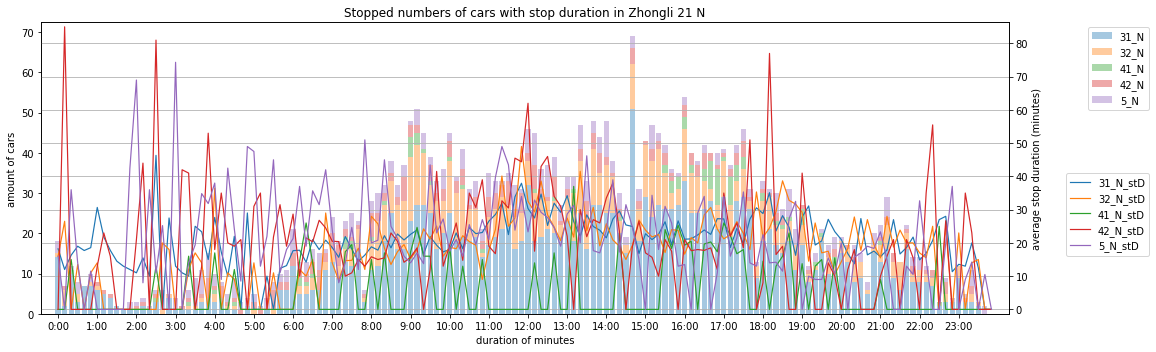

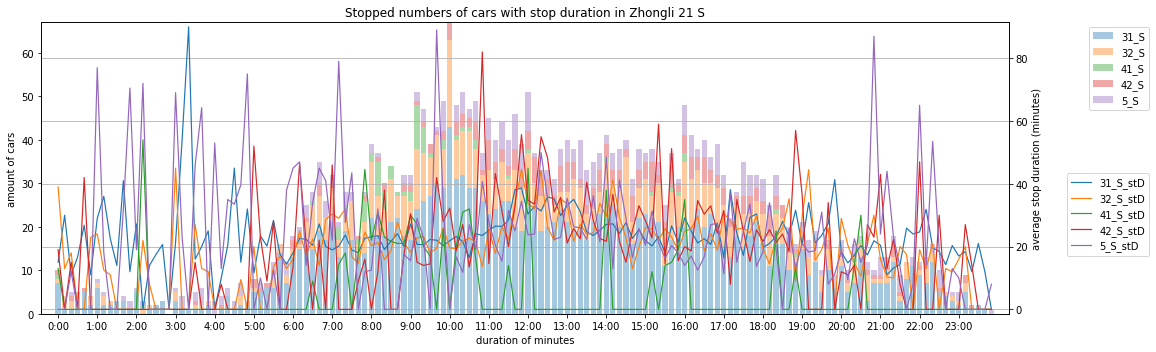

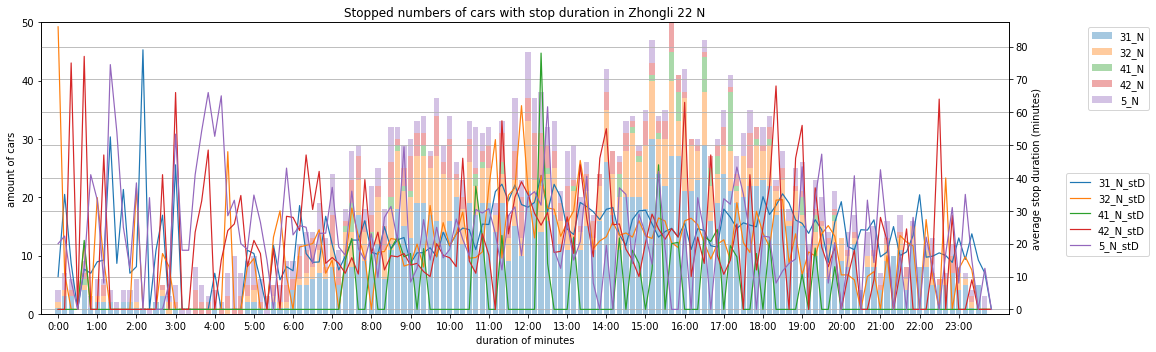

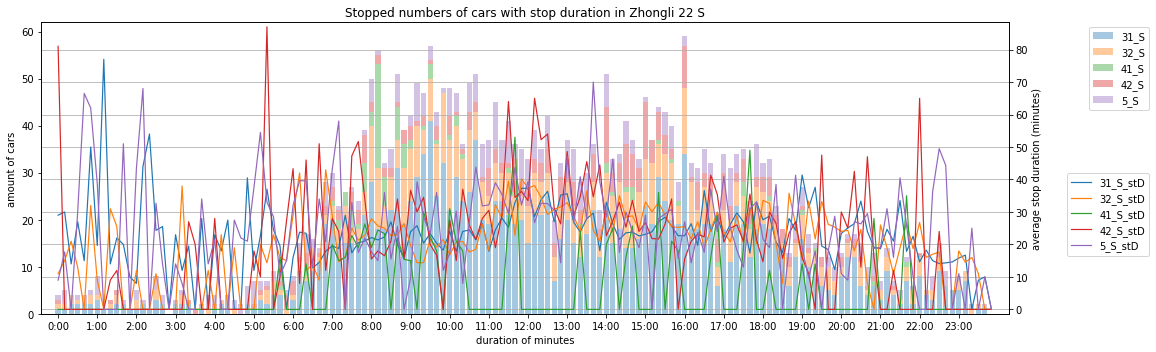

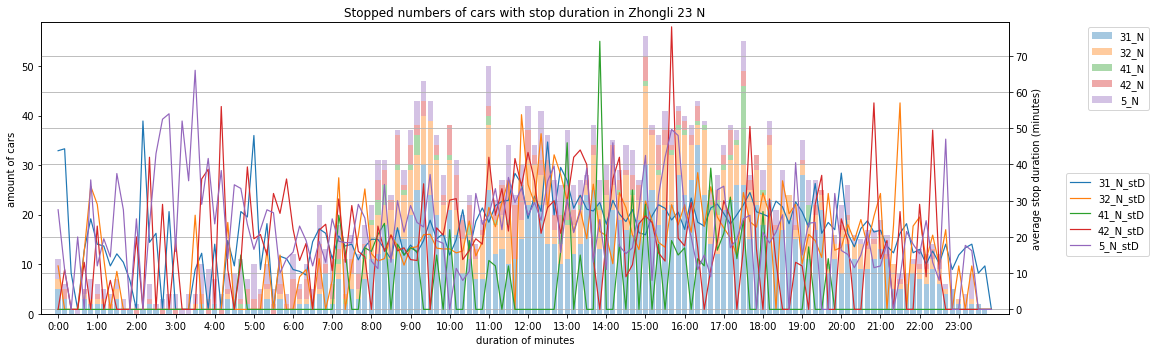

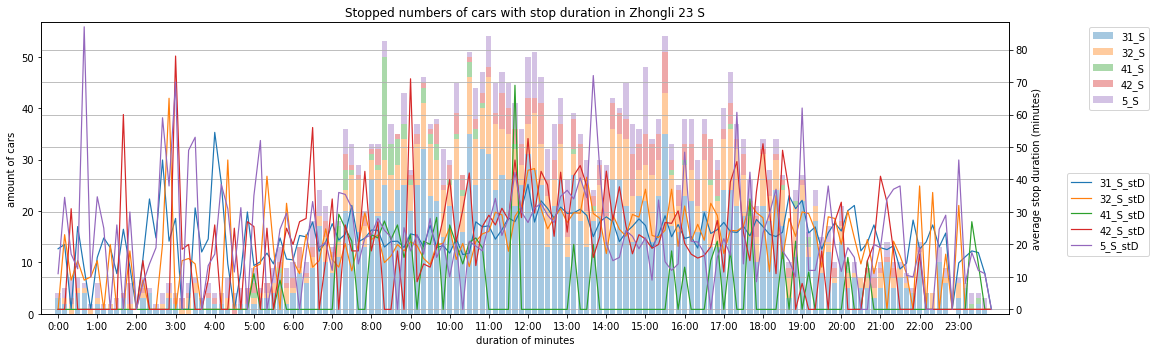

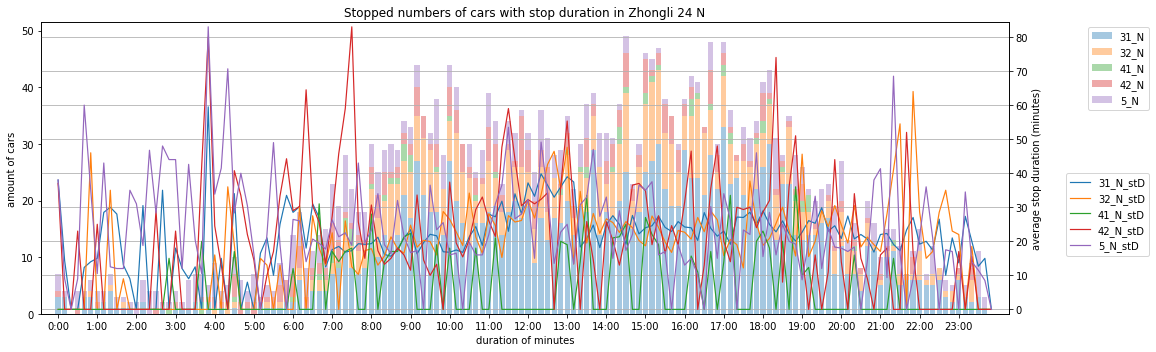

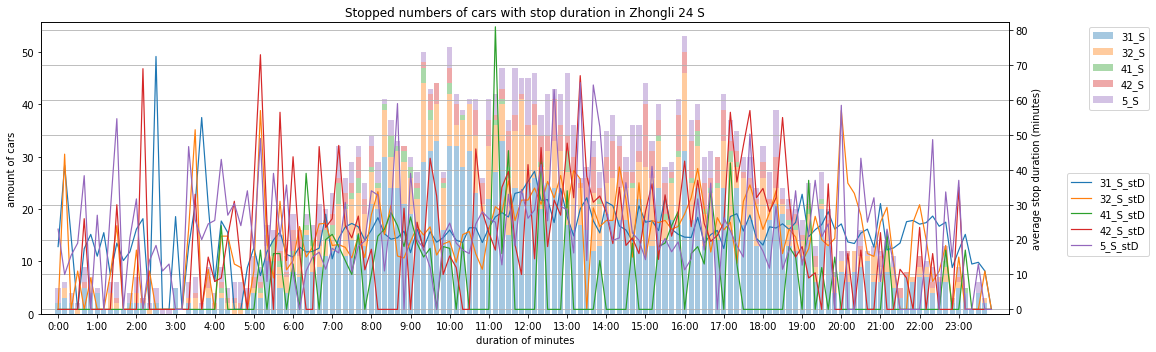

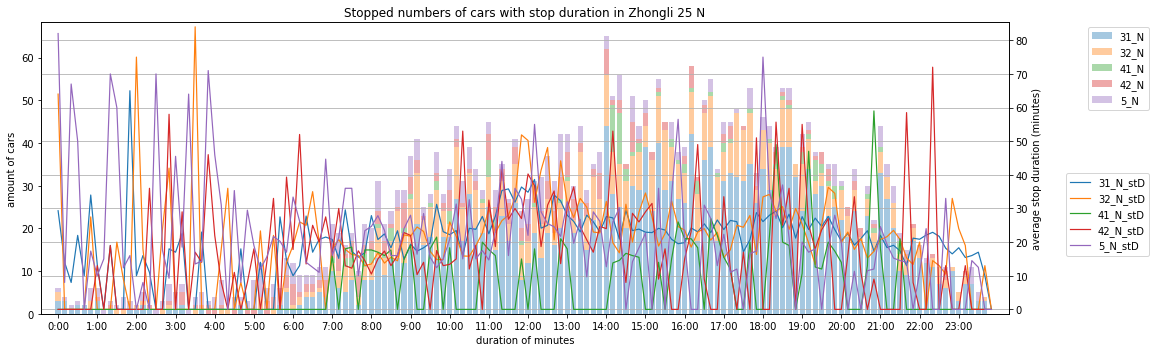

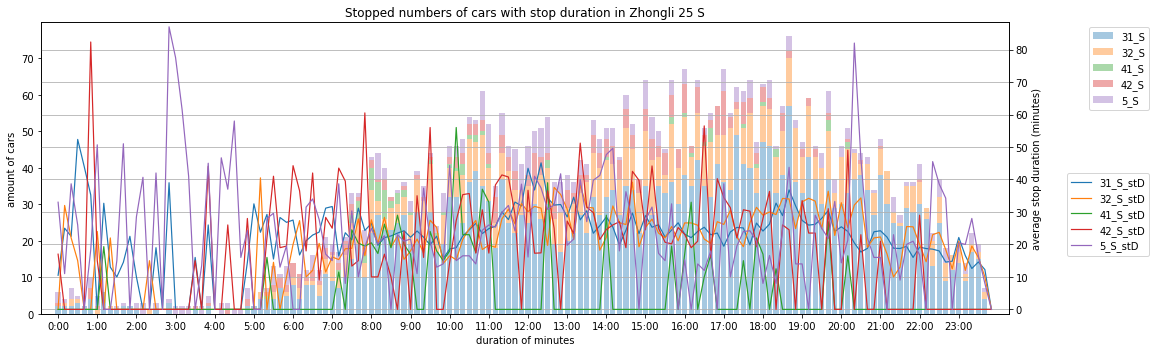

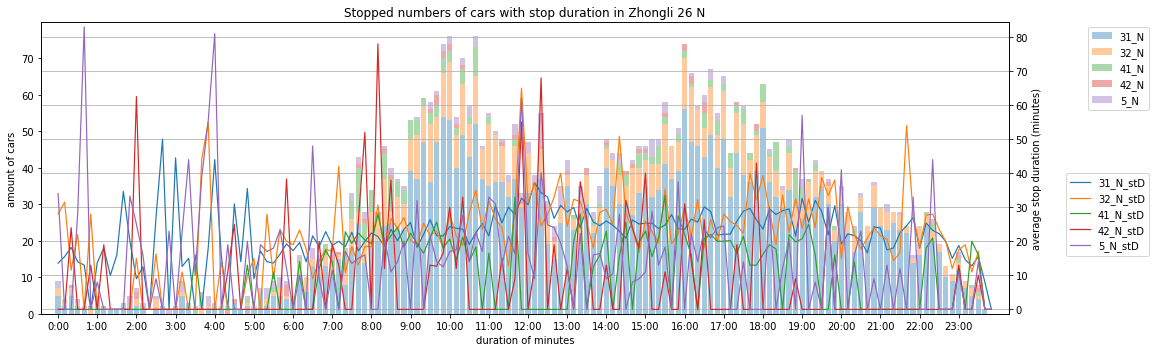

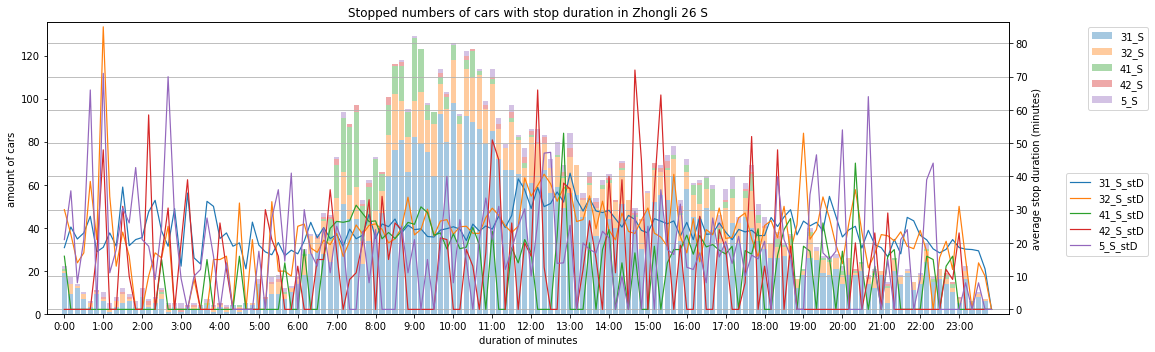

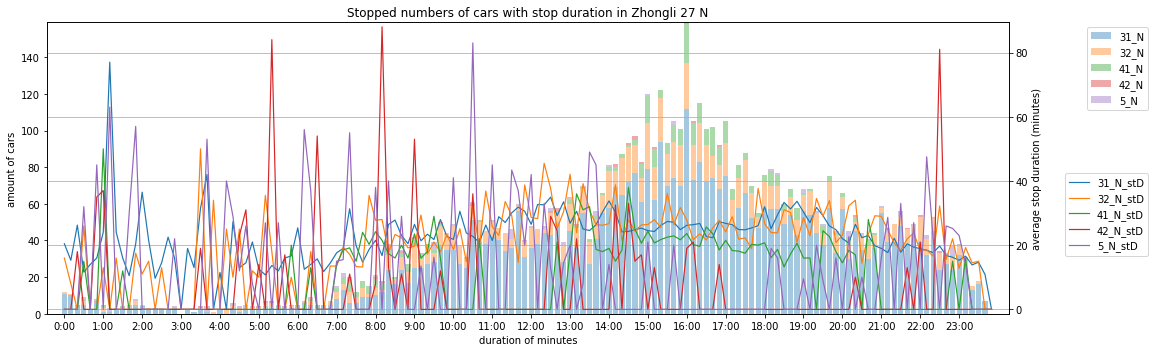

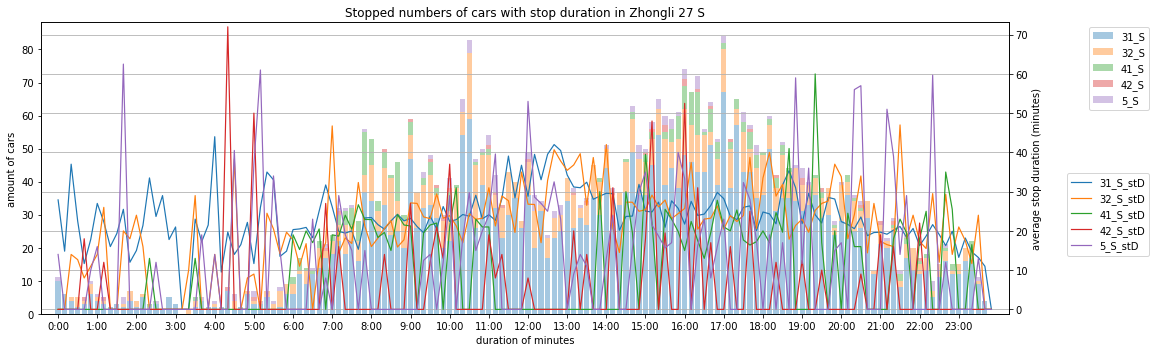

In [109]:
drawing_stD_cnt_10min_batch(df_stDcnt_dict, days, col_min, "Zhongli")